<a href="https://colab.research.google.com/github/KrpesFilip/NLP/blob/main/LV4_word_embeddingsFK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LV 4: Word Embeddings i Semantička Sličnost

---

## 1. Uvod u Word Embeddings

Word embeddings predstavljaju tehniku prikaza riječi u numeričkom obliku ("vektori riječi") gdje su slične riječi (po značenju) smještene blizu u vektorskom prostoru. Umjesto rada s pojedinačnim riječima, tekstualne podatke modeliramo kao skup vektora koji dobro zadržavaju semantičke odnose. Time omogućujemo računalima napredno razumijevanje značenja riječi, pa se embeddingi koriste u zadacima poput prepoznavanja sinonima, pronalaženja antonima, mjerenja sličnosti rečenica i mnogim naprednim aplikacijama obrade jezika.

### Najčešće korištene tehnike:
- **Word2Vec**: model treniran na temelju konteksta riječi (CBOW i Skip-gram)
- **GloVe** (Global Vectors): kombinira globalnu statistiku i lokalni kontekst
- **FastText**: proširenje Word2Veca koje uključuje podriječi

### Korištenjem pretreniranih modela embeddinga možemo:
- Lako pronaći slične i suprotne riječi
- Vizualizirati prostorne odnose između pojmova (PCA, t-SNE)
- Mjeriti sličnost između rečenica ili dokumenata
- Koristiti embeddinge kao ulazne podatke za napredne NLP modele

Nakon ove vježbe studenti će moći raditi s embeddingima, razumjeti kako oni predstavljaju značenje riječi te koristiti embeddinge za analizu sličnosti i semantičkih odnosa u tekstu.

---



## 2. Korištene biblioteke

U ovoj vježbi koristimo:

**gensim**  
Biblioteka za rad s word embeddingima, uključuje:
- Učitavanje pretreniranih Word2Vec i GloVe modela
- Računanje semantičke sličnosti
- Operacije s vektorima riječi

**scikit-learn**  
Za smanjenje dimenzionalnosti i vizualizaciju (PCA, t-SNE).

**matplotlib**  
Za crtanje grafova i vizualizacija embedding prostora.

**numpy**  
Za matematičke operacije s vektorima.

---


In [1]:
!pip install -q gensim numpy matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 64.9 MB/s eta 0:00:00


In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 3. Inicijalizacija okruženja i učitavanje modela

---

### Primjer: Učitavanje pretreniranog Word2Vec modela

Gensim biblioteka omogućuje jednostavno preuzimanje različitih pretreniranih modela. U ovom primjeru koristimo **glove-wiki-gigaword-50**, manji model (50 dimenzija) pogodan za brzo testiranje.

Možete koristiti i veće modele poput:
- `glove-wiki-gigaword-100`
- `glove-wiki-gigaword-200`
- `word2vec-google-news-300` (vrlo velik, potrebno više vremena)


In [3]:
print("Učitavanje modela...")
model = api.load("glove-wiki-gigaword-50")
print("Model uspješno učitan!")

print(f"Broj riječi u modelu: {len(model)}")

Učitavanje modela...
[==================================================] 100.0% 66.0/66.0MB downloaded
Model uspješno učitan!
Broj riječi u modelu: 400000


---

### Primjer: Prikaz vektora riječi

Svaka riječ u modelu ima svoj vektor (niz brojeva). Duljina vektora ovisi o modelu – ovdje je 50 dimenzija.

Demonstracija kako izgleda embedding za riječ "king".


In [4]:
vector_king = model['king']

print(f"Vektor za riječ 'king' (prvih 10 vrijednosti):")
print(vector_king[:10])

print(f"\nDuljina vektora: {len(vector_king)}")
print(f"Tip podatka: {type(vector_king)}")


Vektor za riječ 'king' (prvih 10 vrijednosti):
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]

Duljina vektora: 50
Tip podatka: <class 'numpy.ndarray'>


---

### Primjer: Računanje sličnosti između dviju riječi

Embeddings omogućuju mjerenje semantičke sličnosti. Model računa **kosinusnu sličnost** između vektora dviju riječi. Vrijednost je između 0 (potpuno različite) i 1 (identične).


In [5]:

similarity = model.similarity('king', 'queen')
print(f"Sličnost između 'king' i 'queen': {similarity:.4f}")

similarity2 = model.similarity('king', 'apple')
print(f"Sličnost između 'king' i 'apple': {similarity2:.4f}")

similarity3 = model.similarity('computer', 'laptop')
print(f"Sličnost između 'computer' i 'laptop': {similarity3:.4f}")


Sličnost između 'king' i 'queen': 0.7839
Sličnost između 'king' i 'apple': 0.3047
Sličnost između 'computer' i 'laptop': 0.7741


---

### Primjer: Pronalaženje sličnih riječi

Možemo pronaći riječi koje su najbliže (najsličnije) odabranoj riječi, korisno za traženje sinonima.


In [6]:

similar_words = model.most_similar('king', topn=5)

print("5 najsličnijih riječi za 'king':")
for word, score in similar_words:
    print(f"  {word}: {score:.4f}")


5 najsličnijih riječi za 'king':
  prince: 0.8236
  queen: 0.7839
  ii: 0.7746
  emperor: 0.7736
  son: 0.7667


---

### Primjer: Semantičke operacije – Vektorska aritmetika

Jedan od najpoznatijih primjera word embeddinga je **king - man + woman ≈ queen**.

Ovim pristupom možemo "računati" sa značenjima riječi.


In [7]:
# King - man + woman = ?
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

print("king - man + woman =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

# Paris - France + Italy = ?
result2 = model.most_similar(positive=['paris', 'italy'], negative=['france'], topn=3)

print("\nparis - france + italy =")
for word, score in result2:
    print(f"  {word}: {score:.4f}")


king - man + woman =
  queen (sličnost: 0.8524)

paris - france + italy =
  rome: 0.8466
  milan: 0.7766
  turin: 0.7666


---

### Primjer: Vizualizacija embeddinga pomoću PCA

PCA (Principal Component Analysis) je linearni algoritam koji smanjuje broj dimenzija vektora, zadržavajući što više informacija. Koristimo ga za prikaz riječi u 2D prostoru.

Ovdje ćemo vizualizirati nekoliko odabranih riječi iz različitih domena.


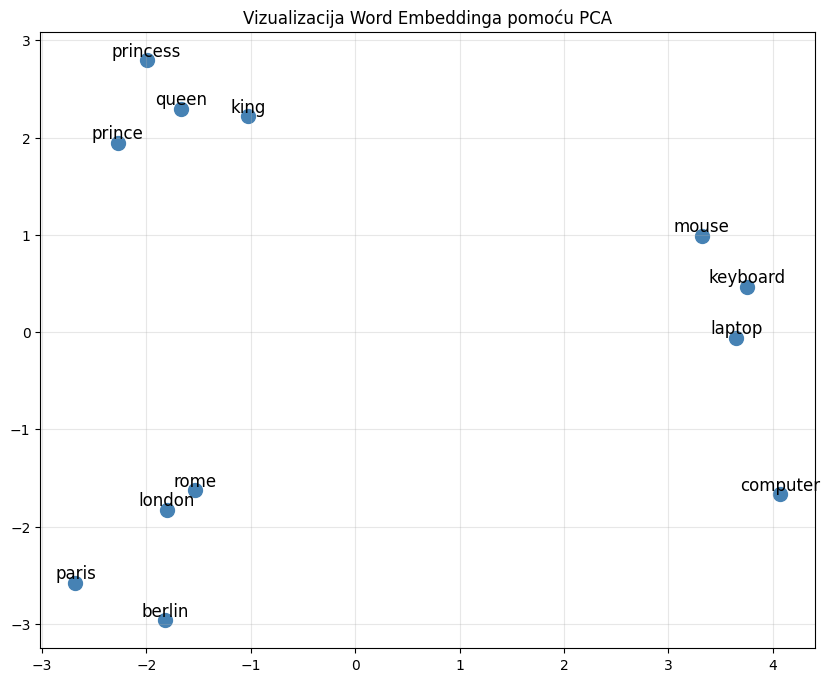

In [8]:
words = ['king', 'queen', 'prince', 'princess',
         'paris', 'london', 'berlin', 'rome',
         'computer', 'laptop', 'keyboard', 'mouse']

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=2)
coords = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], s=100, color='steelblue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću PCA')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Vizualizacija embeddinga pomoću t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) je nelinearna tehnika koja bolje čuva lokalne odnose između riječi. Često daje preglednije klastere nego PCA.

**Napomena**: t-SNE može davati različite rezultate pri svakom pokretanju zbog stohastičke prirode algoritma.


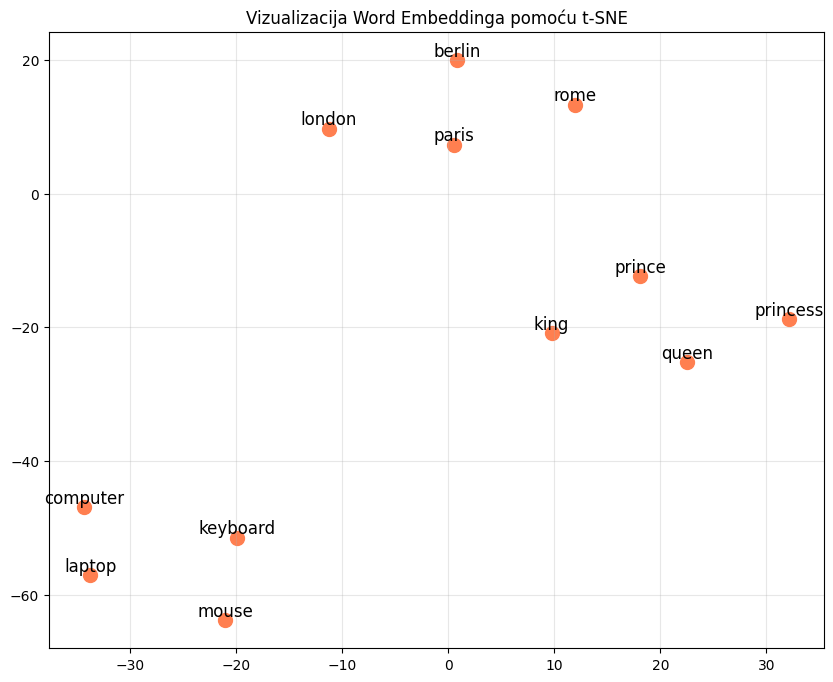

In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords_tsne[:, 0], coords_tsne[:, 1], s=100, color='coral')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords_tsne[i, 0], coords_tsne[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću t-SNE')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Računanje sličnosti rečenica

Isti pristup možemo proširiti i na rečenice: najjednostavniji način je izračunati prosječni embedding, odnosno prosjek vektora svih riječi u rečenici.

**Napomena**: Ova metoda ne uzima u obzir redoslijed riječi, ali daje korisnu aproksimaciju semantičke sličnosti.


In [10]:
def sentence_vector(sentence, model):
    words = [word.lower() for word in sentence.split() if word.lower() in model]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in words], axis=0)

def sentence_similarity(sent1, sent2, model):
    vec1 = sentence_vector(sent1, model)
    vec2 = sentence_vector(sent2, model)

    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    if norm1 == 0 or norm2 == 0:
        return 0.0

    return dot_product / (norm1 * norm2)


s1 = "The cat sits on the mat."
s2 = "A dog rests on the carpet."
s3 = "I love programming in Python."

print(f"Sličnost između rečenica 1 i 2: {sentence_similarity(s1, s2, model):.4f}")
print(f"Sličnost između rečenica 1 i 3: {sentence_similarity(s1, s3, model):.4f}")
print(f"Sličnost između rečenica 2 i 3: {sentence_similarity(s2, s3, model):.4f}")

Sličnost između rečenica 1 i 2: 0.9715
Sličnost između rečenica 1 i 3: 0.8037
Sličnost između rečenica 2 i 3: 0.8108


## Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

Koristite učitani Word2Vec/GloVe model za istraživanje semantičkih odnosa između riječi. Pronađite sinonime, testirajte vektorsku aritmetiku i analizirajte rezultate.



1. Pronađite 10 najsličnijih riječi za pojam "doctor"
2. Pronađite 10 najsličnijih riječi za pojam "technology"
3. Testirajte vektorsku aritmetiku:
   - king - man + woman = ?
   - doctor - man + woman = ?
   - berlin - germany + france = ?
   - python - programming + cooking = ?
4. Analizirajte rezultate i objasnite koje analogije model dobro prepoznaje, a gdje griješi


In [12]:
# Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

similar_words1 = model.most_similar('doctor', topn=10)

print("10 najsličnijih riječi za 'doctor':")
for word, score in similar_words1:
    print(f"  {word}: {score:.4f}")

10 najsličnijih riječi za 'doctor':
  nurse: 0.7977
  physician: 0.7965
  patient: 0.7612
  child: 0.7559
  teacher: 0.7538
  surgeon: 0.7479
  psychiatrist: 0.7422
  doctors: 0.7394
  father: 0.7334
  mother: 0.7284


In [13]:
similar_words2 = model.most_similar('technology', topn=10)

print("10 najsličnijih riječi za 'technology':")
for word, score in similar_words2:
    print(f"  {word}: {score:.4f}")

10 najsličnijih riječi za 'technology':
  technologies: 0.8928
  computer: 0.8526
  systems: 0.8289
  software: 0.8090
  computing: 0.7991
  innovation: 0.7876
  business: 0.7864
  tool: 0.7848
  developed: 0.7802
  research: 0.7735


In [16]:
similarity4 = model.similarity('happy', 'cheerful')
print(f"Sličnost između 'happy' i 'cheerful': {similarity4:.4f}")

Sličnost između 'happy' i 'cheerful': 0.5757


In [17]:
similarity5 = model.similarity('happy', 'thrilled')
print(f"Sličnost između 'happy' i 'thrilled': {similarity5:.4f}")

Sličnost između 'happy' i 'thrilled': 0.7840


In [18]:
similarity6 = model.similarity('happy', 'glad')
print(f"Sličnost između 'happy' i 'glad': {similarity6:.4f}")

Sličnost između 'happy' i 'glad': 0.8659


In [20]:

resulta = model.most_similar(positive=['doctor', 'woman'], negative=['man'], topn=1)

print("doctor - man + woman =")
print(f"  {resulta[0][0]} (sličnost: {resulta[0][1]:.4f})")


resultb = model.most_similar(positive=['berlin', 'france'], negative=['germany'], topn=3)

print("\nberlin - germany + france =")
for word, score in resultb:
    print(f"  {word}: {score:.4f}")


resultc = model.most_similar(positive=['python', 'cooking'], negative=['programming'], topn=3)

print("\npython - programming + cooking =")
for word, score in resultc:
    print(f"  {word}: {score:.4f}")

doctor - man + woman =
  nurse (sličnost: 0.8405)

berlin - germany + france =
  paris: 0.9169
  prohertrib: 0.7950
  brussels: 0.7606

python - programming + cooking =
  roasted: 0.6643
  goat: 0.6612
  seaweed: 0.6557


Pronalaženjem sličnih riječi pronađene su riječi iste tematike vrlo pouzdano, ali bilo je par outliera kao child mother i father koji ćesto asociirani s temom ali nisu slične riječi. Sinonimi su imali dosta velike sličnosti (happy i glad) ali cheerfull je imao značajno niži rezultat iako znači slično, vj. jer u riječniku nije toliko često prikazana riječ. Vektorska aritmetika je dala dobre rezultate dok su kombinirane riječi iz sličnog područja tj. povezane riječi. python i cooking nema veze jedno s drugim i stoga daje besmisleni rezultat (roasted,goat)

## Zadatak 2: Detekcija outliera - koja riječ ne pripada grupi?





Implementirajte funkciju koja detektira koja riječ ne pripada grupi sličnih riječi. Ovo je praktična primjena u analizi teksta i detekciji anomalija

**Napomena**:  Koristite embedding model za pronalaženje "outliera".

Testirajte sljedeće grupe riječi i pronađite koja riječ ne pripada:

1. ['breakfast', 'lunch', 'dinner', 'cement']
2. ['cat', 'dog', 'mouse', 'computer']
3. ['paris', 'london', 'berlin', 'table']
4. ['happy', 'joyful', 'cheerful', 'angry']
5. ['python', 'java', 'javascript', 'banana']

Za svaku grupu:
- Pronađite outlier riječ
- Izračunajte njenu prosječnu sličnost s ostalim riječima
- Objasnite zašto je detektirana kao outlier


In [ ]:
test_groups = [
    ['breakfast', 'lunch', 'dinner', 'cement'],
    ['cat', 'dog', 'mouse', 'computer'],
    ['paris', 'london', 'berlin', 'table'],
    ['happy', 'joyful', 'cheerful', 'angry'],
    ['python', 'java', 'javascript', 'banana']
]

In [21]:
# Zadatak 2: Detekcija outliera



def detect_outlier(words, model):
    """
    Funkcija detektira riječ koja ne pripada grupi na temelju embeddings.

    Args:
        words (list of str): lista riječi
        model: učitani word embedding model (Word2Vec, FastText, itd.)

    Returns:
        outlier (str): riječ koja je outlier
        avg_similarity (float): prosječna sličnost outlier riječi s ostalim riječima
    """
    avg_similarities = {}

    for word in words:
        similarities = []
        for other_word in words:
            if word != other_word:
                try:
                    sim = model.similarity(word, other_word)
                    similarities.append(sim)
                except KeyError:

                    continue
        if similarities:
            avg_similarities[word] = sum(similarities) / len(similarities)
        else:
            avg_similarities[word] = 0


    outlier = min(avg_similarities, key=avg_similarities.get)
    return outlier, avg_similarities[outlier]


groups = [
    ['breakfast', 'lunch', 'dinner', 'cement'],
    ['cat', 'dog', 'mouse', 'computer'],
    ['paris', 'london', 'berlin', 'table'],
    ['happy', 'joyful', 'cheerful', 'angry'],
    ['python', 'java', 'javascript', 'banana']
]

for group in groups:
    outlier, avg_sim = detect_outlier(group, model)
    print(f"Grupa: {group}")
    print(f"  Outlier: {outlier}")
    print(f"  Prosječna sličnost s ostalim riječima: {avg_sim:.4f}\n")


Grupa: ['breakfast', 'lunch', 'dinner', 'cement']
  Outlier: cement
  Prosječna sličnost s ostalim riječima: 0.1079

Grupa: ['cat', 'dog', 'mouse', 'computer']
  Outlier: computer
  Prosječna sličnost s ostalim riječima: 0.4032

Grupa: ['paris', 'london', 'berlin', 'table']
  Outlier: table
  Prosječna sličnost s ostalim riječima: 0.4166

Grupa: ['happy', 'joyful', 'cheerful', 'angry']
  Outlier: angry
  Prosječna sličnost s ostalim riječima: 0.4812

Grupa: ['python', 'java', 'javascript', 'banana']
  Outlier: banana
  Prosječna sličnost s ostalim riječima: 0.1410



Sve riječi izbačene su semantički različite od ostalih.

## Zadatak 3: Vizualizacija tematskih klastera pomoću PCA i t-SNE


Vizualizirajte embedding prostor za riječi iz različitih domena (hrana, tehnologija, sport, gradovi). Usporedite PCA i t-SNE vizualizacije.

Koristite sljedeće riječi iz 4 kategorije:
- Hrana: ['pizza', 'burger', 'pasta', 'salad', 'bread']
- Tehnologija: ['computer', 'laptop', 'smartphone', 'tablet', 'software']
- Sport: ['football', 'basketball', 'tennis', 'swimming', 'running']
- Gradovi: ['paris', 'london', 'tokyo', 'berlin', 'rome']

Zadaci:
1. Vizualizirajte sve riječi pomoću PCA u 2D prostoru
2. Vizualizirajte iste riječi pomoću t-SNE
3. Obojite svaku kategoriju različitom bojom
4. Usporedite rezultate i objasnite razlike između PCA i t-SNE


In [ ]:
categories = {
    'Hrana': ['pizza', 'burger', 'pasta', 'salad', 'bread'],
    'Tehnologija': ['computer', 'laptop', 'smartphone', 'tablet', 'software'],
    'Sport': ['football', 'basketball', 'tennis', 'swimming', 'running'],
    'Gradovi': ['paris', 'london', 'tokyo', 'berlin', 'rome']
}

In [ ]:
# Zadatak 3: Vizualizacija tematskih klastera

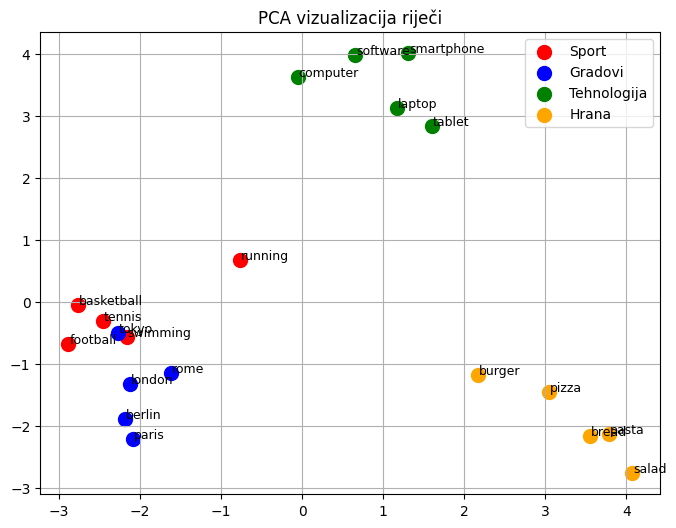

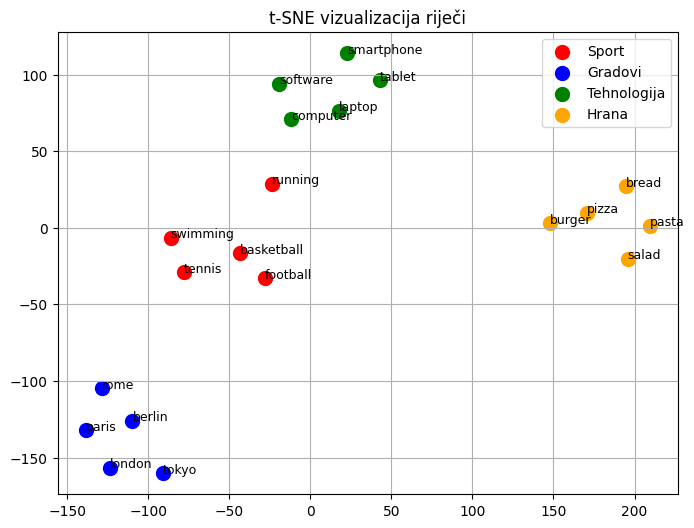

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np



categories = {
    'Hrana': ['pizza', 'burger', 'pasta', 'salad', 'bread'],
    'Tehnologija': ['computer', 'laptop', 'smartphone', 'tablet', 'software'],
    'Sport': ['football', 'basketball', 'tennis', 'swimming', 'running'],
    'Gradovi': ['paris', 'london', 'tokyo', 'berlin', 'rome']
}


all_words = []
vectors = []
labels = []

for category, words in categories.items():
    for word in words:
        try:
            vec = model[word]
            all_words.append(word)
            vectors.append(vec)
            labels.append(category)
        except KeyError:
            print(f"Riječ '{word}' nije u vokabularu modela.")

vectors = np.array(vectors)


pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)


tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_tsne = tsne.fit_transform(vectors)


def plot_embeddings(vectors_2d, labels, title):
    plt.figure(figsize=(8,6))
    categories_unique = list(set(labels))
    colors = ['red', 'blue', 'green', 'orange']

    for cat, color in zip(categories_unique, colors):
        idx = [i for i, l in enumerate(labels) if l == cat]
        plt.scatter(vectors_2d[idx,0], vectors_2d[idx,1], c=color, label=cat, s=100)
        for i in idx:
            plt.text(vectors_2d[i,0]+0.01, vectors_2d[i,1]+0.01, all_words[i], fontsize=9)

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


plot_embeddings(vectors_pca, labels, "PCA vizualizacija riječi")


plot_embeddings(vectors_tsne, labels, "t-SNE vizualizacija riječi")

PCA je više raspršen klaster, također PCA ima više pomješane klase. t-SNE su clasteri bolje odjeljeni i jasno se klase mogu razdvojiti.

## Zadatak 4: Semantička sličnost rečenica i analiza tekstova



Implementirajte funkciju za mjerenje sličnosti rečenica i testirajte na različitim parovima rečenica te analizirajte gdje metoda radi dobro, a gdje ima ograničenja.


Funkciju testirajte je na sljedećim parovima rečenica:

1. "The cat sits on the mat." vs "A cat is sitting on a rug."
2. "I love programming in Python." vs "Python programming is my passion."
3. "The weather is nice today." vs "I enjoy coding in Python."
4. "Machine learning is fascinating." vs "Artificial intelligence is interesting."
5. "How do I reset my password?" vs "I forgot my password, how to recover it?"
6. "The quick brown fox jumps." vs "A fast auburn fox leaps."

Zadaci:
1. Implementirajte funkciju sentence_similarity() koja računa prosječni embedding
2. Izračunajte sličnost za sve parove
3. Analizirajte rezultate - koje parove model prepoznaje kao slične?
4. Identificirajte ograničenja metode prosječnog embeddinga
5. Predložite moguća poboljšanja


In [23]:
sentence_pairs = [
    ("The cat sits on the mat.", "A cat is sitting on a rug."),
    ("I love programming in Python.", "Python programming is my passion."),
    ("The weather is nice today.", "I enjoy coding in Python."),
    ("Machine learning is fascinating.", "Artificial intelligence is interesting."),
    ("How do I reset my password?", "I forgot my password, how to recover it?"),
    ("The quick brown fox jumps.", "A fast auburn fox leaps.")
]

In [24]:
# Zadatak 4: Semantička sličnost rečenica

def sentence_to_avg_vector(sentence, model):
    """
    Pretvara rečenicu u prosječan embedding vektor.
    Ignorira riječi koje nisu u vokabularu.
    """
    words = sentence.lower().replace('.', '').replace(',', '').split()
    vectors = []
    for word in words:
        try:
            vectors.append(model[word])
        except KeyError:
            continue  # riječ nije u vokabularu
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

def sentence_similarity(sent1, sent2, model):
    """
    Računa kosinusnu sličnost između prosječnih embeddinga dviju rečenica.
    """
    vec1 = sentence_to_avg_vector(sent1, model)
    vec2 = sentence_to_avg_vector(sent2, model)

    # Kosinusna sličnost
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return np.dot(vec1, vec2) / (norm1 * norm2)

# Testiranje svih parova rečenica
for sent1, sent2 in sentence_pairs:
    sim = sentence_similarity(sent1, sent2, model)
    print(f"\"{sent1}\" <> \"{sent2}\" --> sličnost: {sim:.4f}")

"The cat sits on the mat." <> "A cat is sitting on a rug." --> sličnost: 0.9524
"I love programming in Python." <> "Python programming is my passion." --> sličnost: 0.9664
"The weather is nice today." <> "I enjoy coding in Python." --> sličnost: 0.8401
"Machine learning is fascinating." <> "Artificial intelligence is interesting." --> sličnost: 0.8881
"How do I reset my password?" <> "I forgot my password, how to recover it?" --> sličnost: 0.9672
"The quick brown fox jumps." <> "A fast auburn fox leaps." --> sličnost: 0.9158


Parovi koje model dobro prepoznaje kao slične: "The cat sits on the mat." vs "A cat is sitting on a rug." → visoka sličnost jer dijele iste ključne riječi (cat, mat/rug). "I love programming in Python." vs "Python programming is my passion." → visoka sličnost jer dijele Python, programming. Parovi koji imaju nisku sličnost: "The weather is nice today." vs "I enjoy coding in Python." → niska sličnost jer teme nisu povezane. "Machine learning is fascinating." vs "Artificial intelligence is interesting." → srednja sličnost; prosječni embedding možda ne hvata dobro semantičku povezanost. Ograničenja metode prosječnog embeddinga: Gubi redoslijed riječi i sintaksu rečenice. Ne hvata fraze i kontekst (npr. not good može biti pogrešno interpretirano). Osjetljivost na riječi koje nisu u vokabularu. Moguća poboljšanja: Korištenje contextual embeddings poput BERT, RoBERTa, ili Sentence-BERT, koji bolje hvataju kontekst i semantiku rečenica. Tehnike ponderiranja riječi (TF-IDF ili attention) prije prosječnog računanja. Korištenje modela za sličnost rečenica (sentence embeddings) umjesto običnih word embeddinga.